In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio gdown

In [ ]:
import gdown # io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show,show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Finland

In [ ]:
file_ids = [
    '1PsJ3Cq6UMj7p9tanGlypkCK9VhlgHEoe', # all states
    '1jzKweAj0mZ9rlm_dSujYmnu0iTlD1PRi', # lapland
    '1N85fy7pxEd7c_QfNIacPjHgtPQuD6-FS', # lapland gez
    # '1uEMeWb4jurlG5Td4YEtHwhyyAZ4U7ObK', # gez
    # '1d7vFrkqUxZ7qqeo8-aSjSuxagOEmI2M7', # wsr
]

for file_id in file_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output=None, quiet=False)

In [ ]:
states = gpd.read_file('/content/FIN_ALL_states.json')
lapland = gpd.read_file('/content/FIN_AL6_Lapland.json')
lapland_gez = gpd.read_file('/content/FIN_AL6_Lapland_GEZ.json')

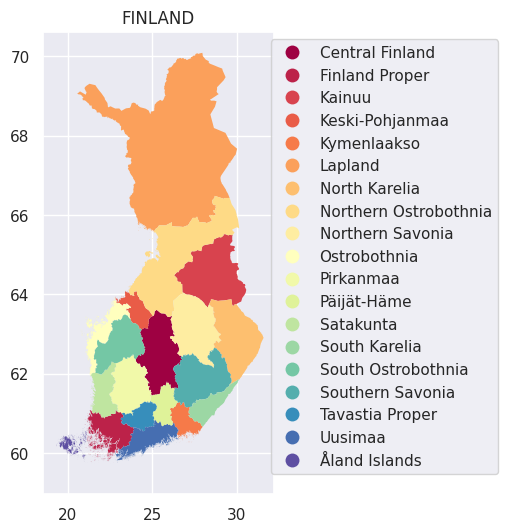

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('FINLAND')

states.plot(ax=ax, column='name', cmap=cmap, edgecolor='None', legend=True)
# states.plot(ax=ax, color='None', edgecolor='grey', legend=False)

# Move the legend to the right of the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))  # (horizontal, vertical)

plt.show()

### Primary forests

In [ ]:
terreseco = gpd.read_file('/content/drive/MyDrive/geospatial/TerrestrialEcoregionsoftheWorld_WWF.geojson')

In [ ]:
primary = gpd.read_file('/content/drive/MyDrive/EuropeanPrimaryForestPolygons.geojson')

In [ ]:
lapland_primary = primary.clip(lapland)

In [ ]:
if lapland_primary.crs != terreseco.crs:
    lapland_primary = lapland_primary.to_crs(terreseco.crs)

In [ ]:
lapland_buffer = lapland_primary.copy()
lapland_buffer['geometry'] = lapland_buffer.geometry.buffer(0.000001)

In [ ]:
lapland_buffer.columns

Index(['id', 'Area_ha', 'BIOGEOGRAP', 'CONTACT_PE', 'DOMINANT_1', 'DOMINANT_2',
       'DOMINANT_T', 'FOREST_NAM', 'FOREST_SHA', 'FOREST_TYP', 'FOREST_T_1',
       'ID_Dataset', 'LAST_DISTU', 'LAST_DIS_1', 'LAST_DIS_2', 'LAST_DIS_3',
       'LAST_DIS_4', 'LAST_DIS_5', 'LOCATION', 'NATURALNES', 'Notes',
       'OBJECTID', 'PROTECTED_', 'PROTECTION', 'RELEVANT_L', 'SHAPE_Area',
       'SHAPE_Leng', 'Source', 'THREAT_1', 'THREAT_2', 'geometry'],
      dtype='object')

In [ ]:
lapland_buffer.head(1)

,id,Area_ha,BIOGEOGRAP,CONTACT_PE,DOMINANT_1,DOMINANT_2,DOMINANT_T,FOREST_NAM,FOREST_SHA,FOREST_TYP,...,OBJECTID,PROTECTED_,PROTECTION,RELEVANT_L,SHAPE_Area,SHAPE_Leng,Source,THREAT_1,THREAT_2,geometry
17638,000000000000000007f7,459.776,Boreal,Olli-Pekka Tikkanen,Picea abies,,Pinus sylvestris,Pahtajärvi,0.728926,Boreal,...,3531,0,1,,0.000972,0.411077,Finnish Environment Institute,0,0,"POLYGON ((23.76510 67.68675, 23.76510 67.68675..."


In [ ]:
forest_types = {
    1: "Boreal",
    2: "Hemiboreal-nemoral",
    3: "Alpine coniferous",
    4: "Acidophilus oak-birch",
    5: "Mesophytic deciduous",
    6: "Lowland beech",
    7: "Montane beech",
    8: "Thermophilus deciduous",
    9: "Broadleaved evergreen",
    10: "Coniferous Mediterranean",
    11: "Mire and swamp",
    12: "Floodplain",
    13: "Non-riverine Alder-birch-aspen"
}

lapland_buffer['FOREST_TYP'] = lapland_buffer['FOREST_TYP'].map(forest_types)

In [ ]:
lapland_buffer['FOREST_T_1'] = lapland_buffer['FOREST_T_1'].map(forest_types)

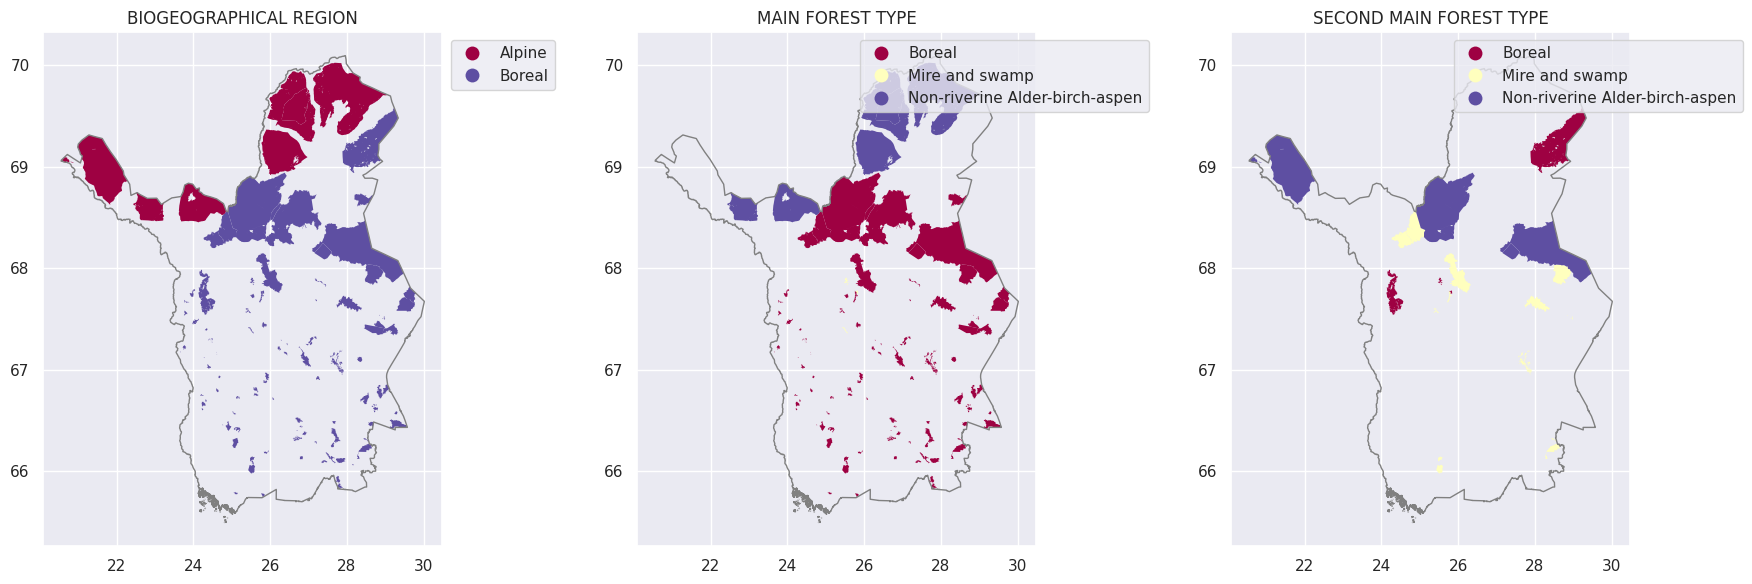

In [ ]:
cmap = 'Spectral'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['BIOGEOGRAP', 'FOREST_TYP', 'FOREST_T_1']
titles = ['BIOGEOGRAPHICAL REGION', 'MAIN FOREST TYPE', 'SECOND MAIN FOREST TYPE']

for ax, column, title in zip(axes, columns, titles):
    ax.set_title(title)
    lapland_buffer.plot(ax=ax, column=column, cmap=cmap, edgecolor='None', legend=True)
    lapland.plot(ax=ax, color='None', edgecolor='grey', legend=False)
    ax.get_legend().set_bbox_to_anchor((1.3, 1))

plt.tight_layout()
plt.show()

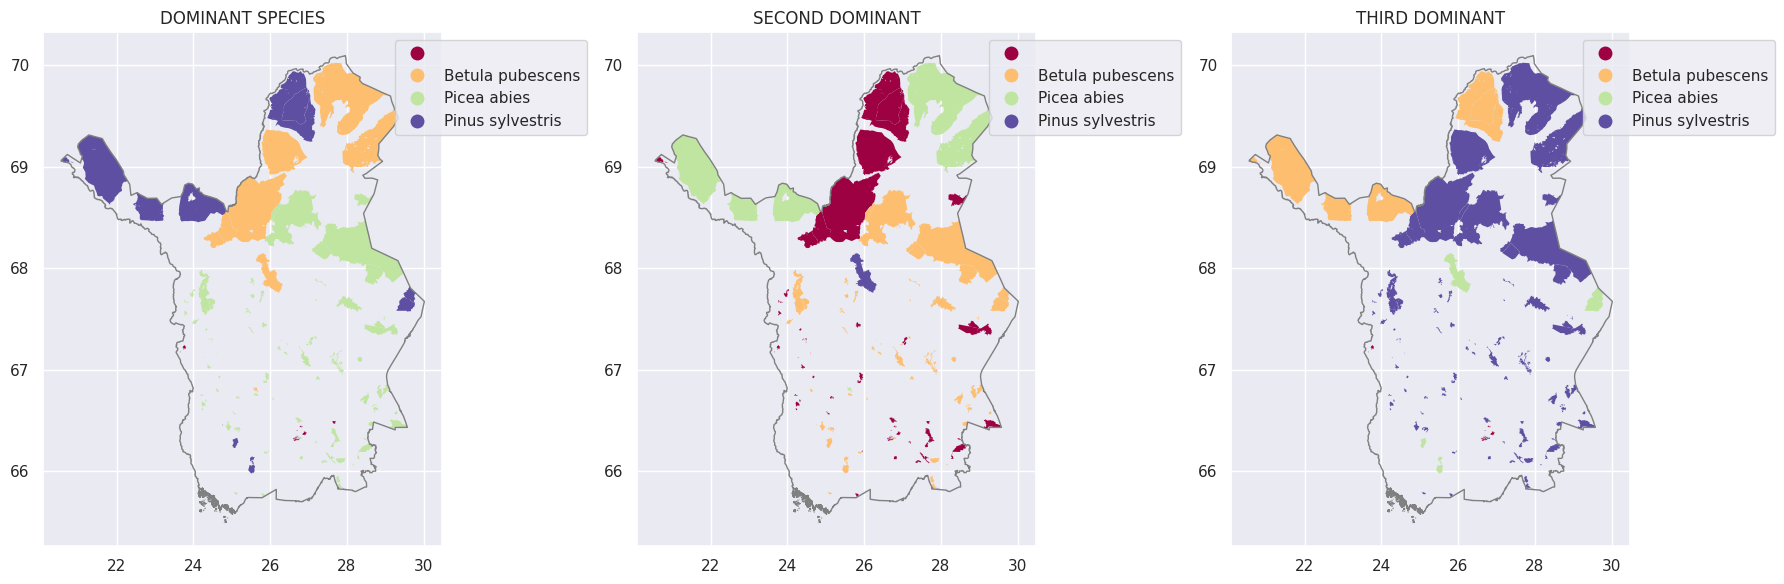

In [ ]:
cmap = 'Spectral'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['DOMINANT_1', 'DOMINANT_2', 'DOMINANT_T']
titles = ['DOMINANT SPECIES', 'SECOND DOMINANT', 'THIRD DOMINANT']

for ax, column, title in zip(axes, columns, titles):
    ax.set_title(title)
    lapland_buffer.plot(ax=ax, column=column, cmap=cmap, edgecolor='None', legend=True)
    lapland.plot(ax=ax, color='None', edgecolor='grey', legend=False)
    ax.get_legend().set_bbox_to_anchor((1.38, 1))

plt.tight_layout()
plt.show()